# Sarah's Titanic Data Set
**Author:** Sarah Howard 

**Date:** March 30. 2025

**Objective:** Predicting a Categorical Target and Evaluating Performance

## Introduction

Using the TItanic dataset, we are going to explore certain features to see if they had an impact on the outcome of surviving the Titanic sinking.


## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [113]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


## Section 1. Load the Data

### 1.1 Load the dataset 

In [114]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

## Section 2. Data Exploration and Preparation

### 2.1 Handle Missing Values and Clean Data

In [115]:
# Impute missing values for age usign the median:

titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill in missing values for embark_town using the mode:

titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

C:\Users\Sarah\AppData\Local\Temp\ipykernel_3784\3742257838.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
C:\Users\Sarah\AppData\Local\Temp\ipykernel_3784\3742257838.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

### 2.2 Feature Engineering

In [116]:
# Create new features

# Add family_size - number of family members on board
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
 
# Convert categorical "sex" to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# Convert categorical "embarked" to numeric
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Binary feature - convert "alone" to numeric
titanic['alone'] = titanic['alone'].astype(int)

## 3. Feature Selection and Justification

### 3.1 Choose features and target

We will do three input cases. 

#### First:

input features: alone

target: survived

#### Second:

input features - age (or another variable of your choice)

target: survived

#### Third:

input features -  age and family_size (or another combination of your choice)

target: survived

### 3.2 Define X (features) and y (target)

In [167]:
# Case 1: alone only 
# X = titanic[['alone']]
# y = titanic['survived']

# Case 2: age only (or your choice)
# X = titanic[['age']]
# y = titanic['survived']

# Case 3: age + family_size (or your choice)
X = titanic[['age', 'family_size']]
y = titanic['survived']

#### Reflection 3:

**Why are these features selected?**

The selected features should provide a good insight into whether the person survived on the Titanic.


**Are there features that are likely to be highly predictive of survival?**

Age and family size will most likely be highly predictive of family size.  Sex would have also been a good feature to predict survivability.

## 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data

In [168]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


### 4.2 Create and Train Model (Decision Tree)

In [169]:
# Create and train a decision tree model with no random initializer argument.

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### 4.3 Predict and Evaluate Model Performance

#### Evaluate model performance on training data

In [170]:
# Predict and evaluate training data (X train)
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))  

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712



#### Evaluate model performance on test data:

In [171]:
# Predict and evaluate test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       110
           1       0.45      0.33      0.38        69

    accuracy                           0.59       179
   macro avg       0.55      0.54      0.54       179
weighted avg       0.57      0.59      0.57       179



### 4.4 Report Confusion Matrix (as a heatmap)

#### Plot a confusion matrix:

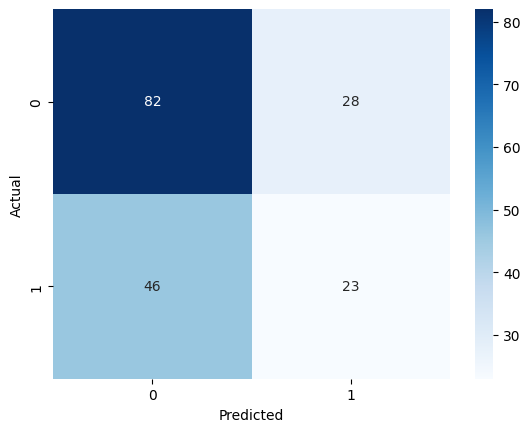

In [172]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()  

### 4.5 Report Decision Tree Plot

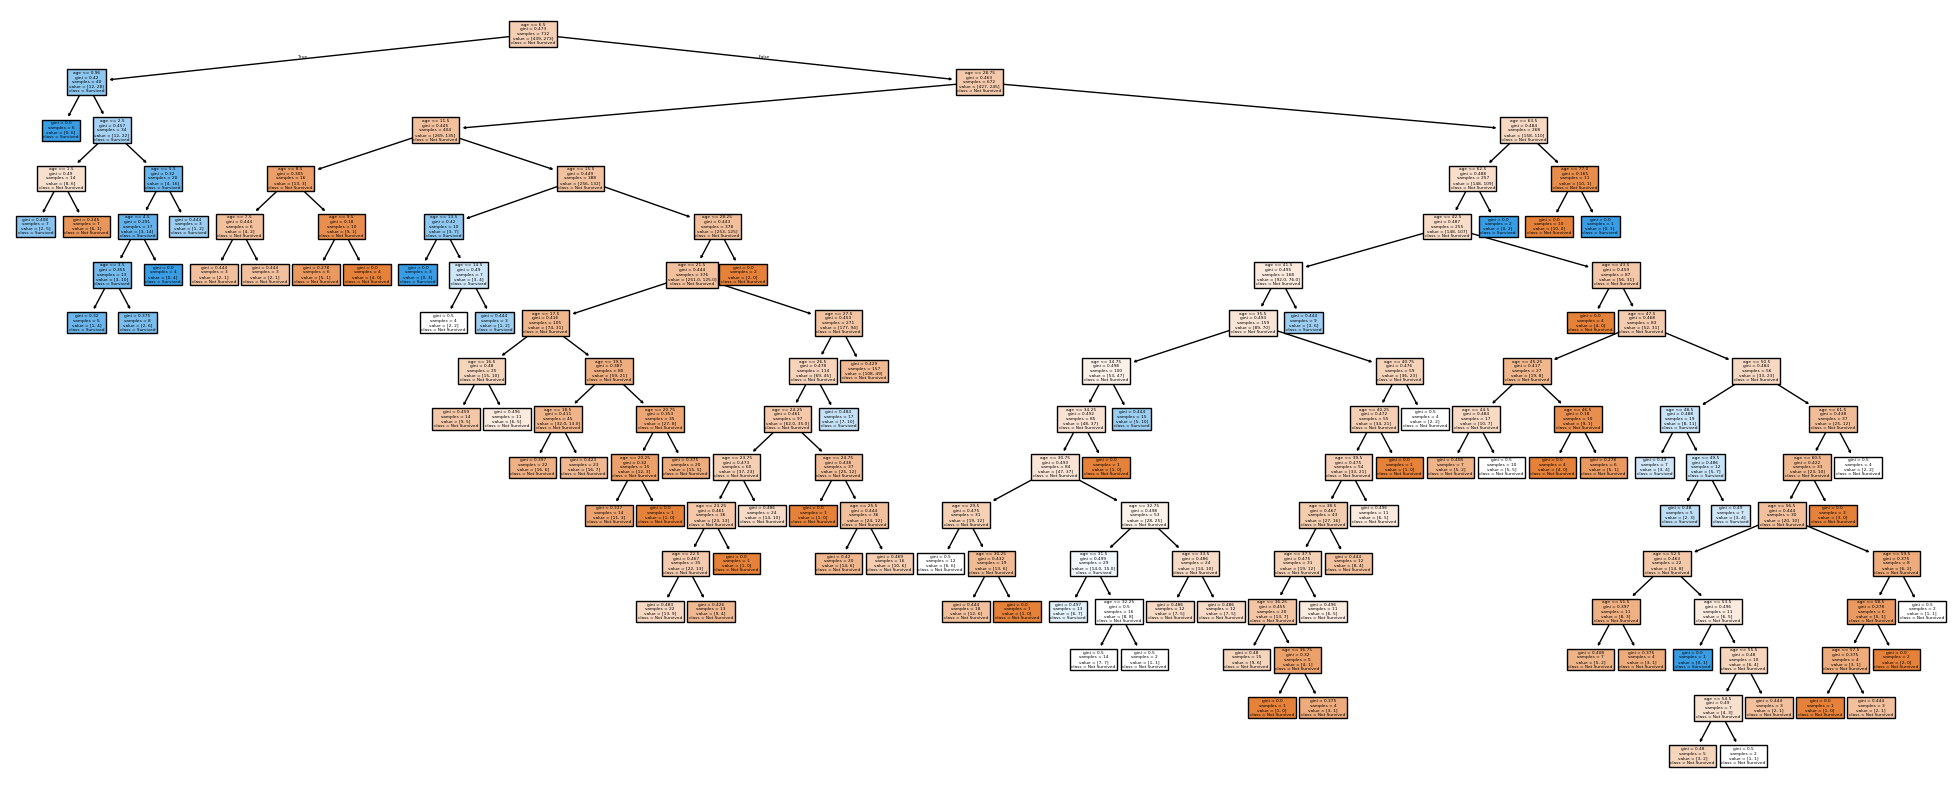

In [148]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic.png")

#### Results of the 3 test cases using a Decision Tree for the Training Data

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 62% | 62% |62% | 62% | Used the weighted average | 
|                   | Case 2 | age | 68% | 68% | 68% | 64% | Used the weighted average |
|                   | Case 3 | age + family_size | 77% | 77% | 77% | 76% | Used the weighted average|

#### Results of the 3 test cases using a Decision Tree for the Test Data

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 63% | 64% |63% | 63% | Used the weighted average | 
|                   | Case 2 | age | 61% | 58% | 61% | 55% | Used the weighted average |
|                   | Case 3 | age + family_size | 59% | 57% | 59% | 57% | Used the weighted average |

#### Reflection 4:
**How well did the different cases perform?**

The alone case appears to have performed the best when compared against the training data.

**Are there any surprising results?**

Test case 3 with the 2 factors appeared to really impact the results of the test data.

**Which inputs worked better** 

The alone factor appears to have worked the best.

## 5. Compare Alternative Models (SVC, NN)

### 5.1 Train and Evaluate Models

#### SVC (RBF Kernel Model)

In [174]:
# Train a SVC model using the default (RBF) kernel 

svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

# Predict and evaluate the SVC model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



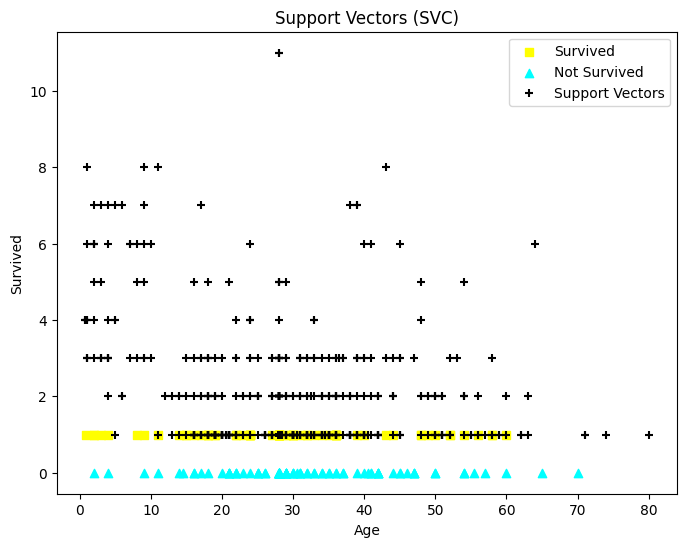

In [175]:
# Visualize Support Vectors

# Create data for charting - input target yes and input target no
survived_age = X_test.loc[y_test == 1, 'age']
not_survived_age = X_test.loc[y_test == 0, 'age']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_age, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_age, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### SVC (Linear Kernel Model)

In [176]:
# Train a SVC model using the Linear kernel 

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Predict and evaluate the SVC model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

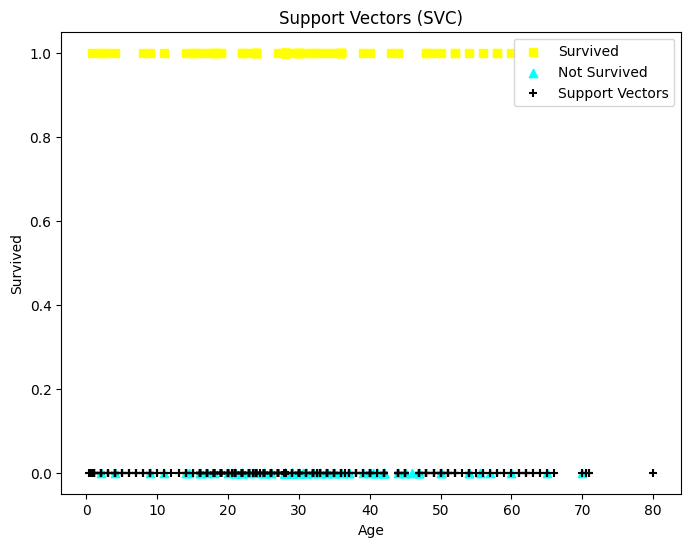

In [163]:
# Visualize Support Vectors

# Create data for charting - input target yes and input target no
survived_age = X_test.loc[y_test == 1, 'age']
not_survived_age = X_test.loc[y_test == 0, 'age']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_age, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_age, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### SVC (Polynomial Kernel)

In [155]:
# Train a SVC model using the Polynomial Kernel with degree = 3

svc_model = SVC(kernel='poly', degree=3)
svc_model.fit(X_train, y_train)

# Predict and evaluate the SVC model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projects\applied-ml-showard\lab03\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

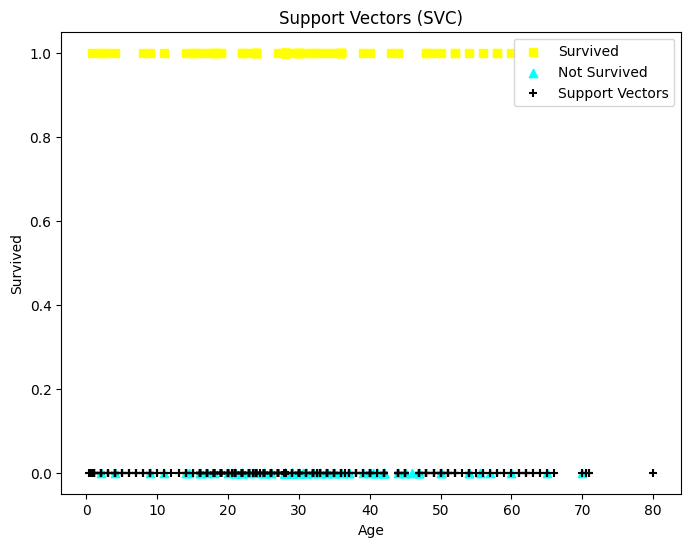

In [164]:
# Visualize Support Vectors

# Create data for charting - input target yes and input target no
survived_age = X_test.loc[y_test == 1, 'age']
not_survived_age = X_test.loc[y_test == 0, 'age']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_age, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_age, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### SVC (Sigmoid Kernel)

In [165]:
# Train a SVC model using the Sigmoid Kernel

svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

# Predict and evaluate the SVC model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       110
           1       0.39      0.38      0.39        69

    accuracy                           0.54       179
   macro avg       0.51      0.51      0.51       179
weighted avg       0.53      0.54      0.53       179



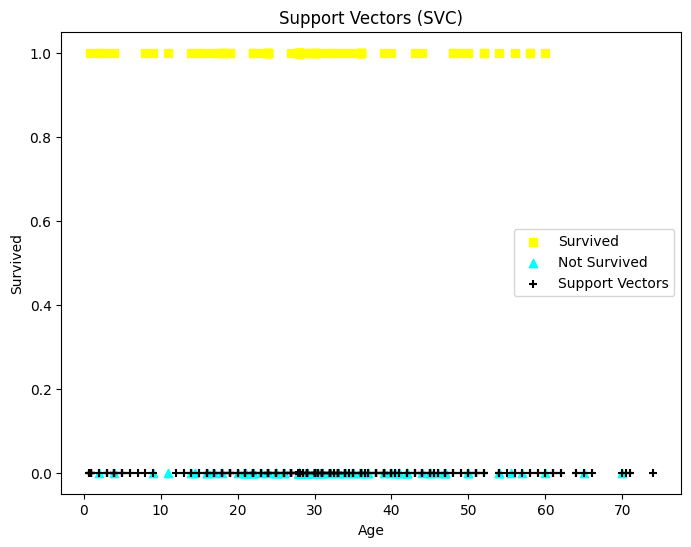

In [166]:
# Visualize Support Vectors

# Create data for charting - input target yes and input target no
survived_age = X_test.loc[y_test == 1, 'age']
not_survived_age = X_test.loc[y_test == 0, 'age']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_age, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_age, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### Scattergram of SVC model (RBF Kernel):
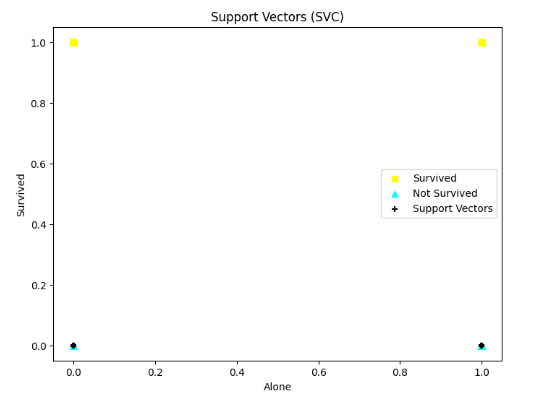 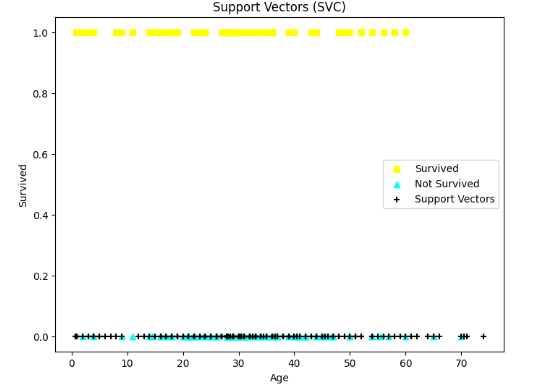

#### Scattergram of SVM model (Linear Kernel):
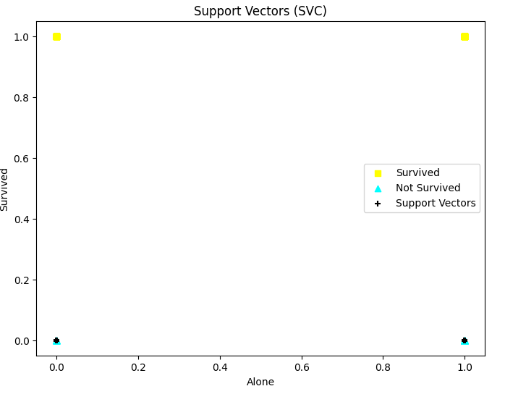 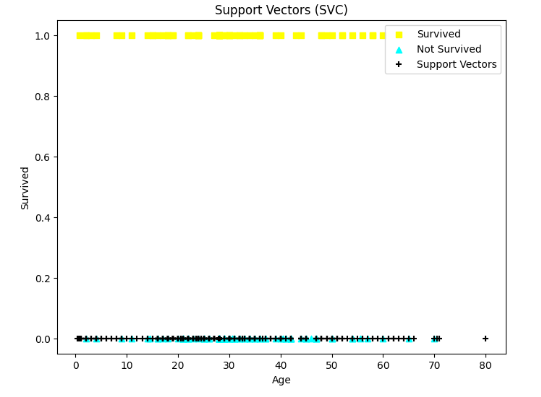

#### Scattergram of SVM Model (Poly Kernel):
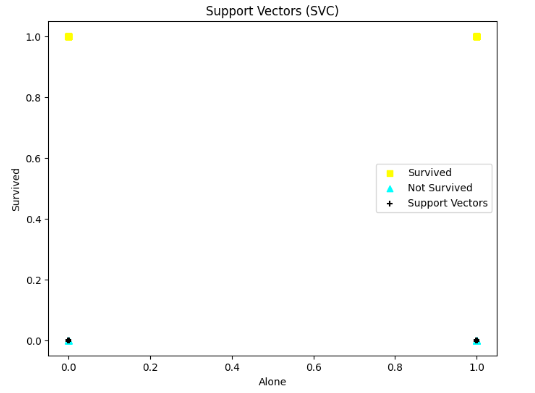 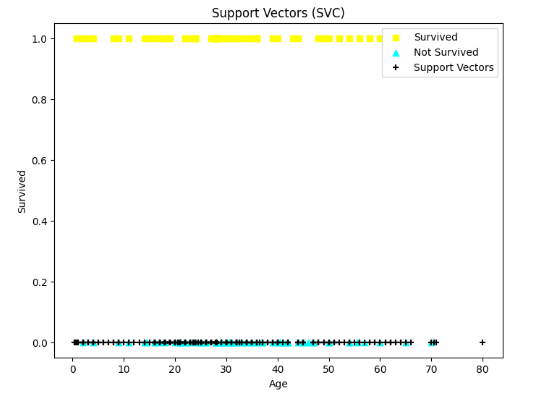

#### Scattergram of SVM Model (Sigmoid Kernel):
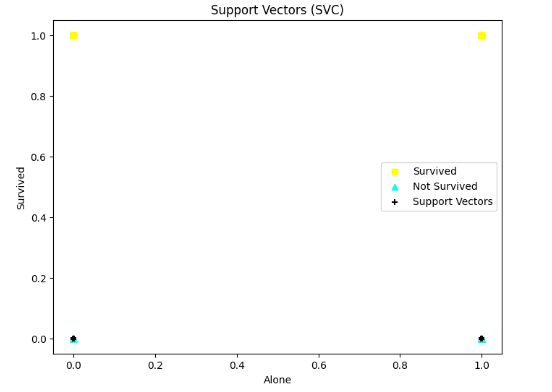 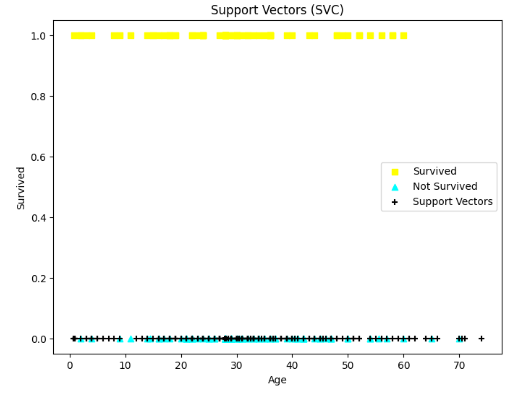

### 5.2 Train and Evaluate Model (NN MLP)

In [159]:
# Train a neural network model:

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

In [160]:
# Predict and evaluate Neural Network model:

y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.63      0.98      0.77       110
           1       0.71      0.07      0.13        69

    accuracy                           0.63       179
   macro avg       0.67      0.53      0.45       179
weighted avg       0.66      0.63      0.52       179



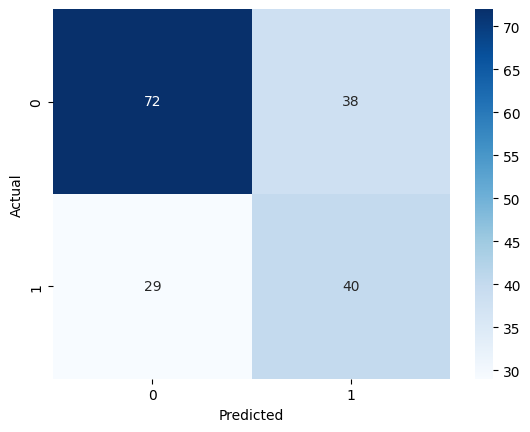

In [128]:
# Plot confusion matrix 

cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | alone | 63% | 64% |63% | 63% | Used the weighted average | 
|                   | Case 2 | age | 61% | 58% | 61% | 55% | Used the weighted average |
|                   | Case 3 | age + family_size | 59% | 57% | 59% | 57% | Used the weighted average |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (RBF Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | Used the weighted average |
|                    | Case 2 | age | 63% | 66% | 63% | 52% | Used the weighted average |
|                    | Case 3 | age + family_size | xx.xx% | xx.xx% | xx.xx% | xx.xx% | Used the weighted average |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Linear Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 61% | 38% | 61% | 47% | - |
|                    | Case 3 | age + family_size | xx.xx% | xx.xx% | xx.xx% | xx.xx% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Poly Kernel)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 61% | 38% | 61% | 47% | - |
|                    | Case 3 | age + family_size | xx.xx% | xx.xx% | xx.xx% | xx.xx% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **SVM (Sigmoid Kernel)** | Case 1 | alone | 63% | 64% |63% | 63% | - |
|                    | Case 2 | age | 54% | 53% | 54% | 53% | - |
|                    | Case 3 | age + family_size | xx.xx% | xx.xx% | xx.xx% | xx.xx% | - |
|-------------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Neural Network (MLP)** | Case 1 | alone | 63% | 64% | 63% | 63% | - |
|                    | Case 2 | age | 63% | 66% | 63% | 52% | - |
|                    | Case 3 | age + family_size | xx.xx% | xx.xx% | xx.xx% | xx.xx% | - |